In [1]:
# Create figures in Python that handle LaTeX, and save images to files in my
# preferred formatting. I typically place this code in the root of each of my
# projects, and import using:
# from latexify import *
# which will also run the latexify() function on the import.

# Based on code from https://nipunbatra.github.io/blog/2014/latexify.html

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

#Back-end to use depends on the system
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('ps', FigureCanvasPgf)

import seaborn as sns
sns.set_style("white")

#my preferred palette. From
#https://seaborn.pydata.org/tutorial/color_palettes.html: "The cubehelix color
#palette system makes sequential palettes with a linear increase or decrease in
#brightness and some variation in hue. This means that the information in your
#colormap will be preserved when converted to black and white (for printing) or
#when viewed by a colorblind individual."

# I typically set the number of colors (below, 8) to the distinct colors I need
# in a given plot, so as to use the full range.
sns.set_palette(sns.color_palette("cubehelix", 8))


# The following is the latexify function. It allows you to create 2 column or 1
# column figures. You may also wish to alter the height or width of the figure.
# The default settings are good for most cases. You may also change the
# parameters such as labelsize and fontsize based on your classfile.
def latexify(fig_width=None, fig_height=None, columns=1, ticksize=8):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 6.9 if columns == 1 else 13.8  # width in inches #3.39

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 16.0
    if fig_height > MAX_HEIGHT_INCHES:
        print(("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches."))
        fig_height = MAX_HEIGHT_INCHES

    params = {
            # 'backend': 'ps',
           #   'pgf.rcfonts': False,
           #   'pgf.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
           #   "pgf.texsystem": "pdflatex",
             # 'text.latex.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
              'text.latex.preamble': '\\usepackage{mathptmx}',
              #values below are useful defaults. individual plot fontsizes are
              #modified as necessary.
              'axes.labelsize': 8,  # fontsize for x and y labels
              'axes.titlesize': 8,
              'font.size': 8,
              'legend.fontsize': 8,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'DejaVu Sans',
              'font.serif': 'Times',
               'lines.linewidth': 1.5,
               'lines.markersize':1,
               'xtick.major.pad' : 2,
               'ytick.major.pad' : 2,
                'axes.xmargin' :  .0,  # x margin.  See `axes.Axes.margins`
                'axes.ymargin' : .0,  # y margin See `axes.Axes.margins`
              }

    matplotlib.rcParams.update(params)

def saveimage(name, fig = plt, extension = 'pdf', folder = 'plots/'):
    sns.despine()

    #Minor ticks off by default in matplotlib
    # plt.minorticks_off()

    #grid being off is the default for seaborn white style, so not needed.
    # plt.grid(False, axis = "x")
    # plt.grid(False, axis = "y")
    
    fig.savefig('{}{}.{}'.format(folder,name, extension), bbox_inches = 'tight')

latexify()

In [14]:
import numpy as np
import getdist
from getdist import plots
import corner
from chainconsumer import ChainConsumer
import os

In [3]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 20})

In [12]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, InsetPosition, mark_inset
from matplotlib.legend_handler import HandlerTuple

In [4]:
colorsDict = {
              # Match pygtc up to v0.2.4
              'blues_old' : ('#4c72b0','#7fa5e3','#b2d8ff'),
              'greens_old' : ('#55a868','#88db9b','#bbffce'),
              'yellows_old' : ('#f5964f','#ffc982','#fffcb5'),
              'reds_old' : ('#c44e52','#f78185','#ffb4b8'),
              'purples_old' : ('#8172b2','#b4a5e5','#37d8ff'),
              # New color scheme, dark colors match matplotlib v2
              'blues' : ('#1f77b4','#52aae7','#85ddff'),
              'oranges' : ('#ff7f0e','#ffb241','#ffe574'),
              'greens' : ('#2ca02c','#5fd35f','#92ff92'),
              'reds' : ('#d62728','#ff5a5b','#ff8d8e'),
              'purples' : ('#9467bd','#c79af0','#facdff'),
              'browns' : ('#8c564b','#bf897e','#f2bcb1'),
              'pinks' : ('#e377c2','#ffaaf5','#ffddff'),
              'grays' : ('#7f7f7f','#b2b2b2','#e5e5e5'),
              'yellows' : ('#bcbd22','#eff055','#ffff88'),
              'cyans' : ('#17becf','#4af1ff','#7dffff'),
          }
defaultColorsOrder = ['blues', 'oranges','greens', 'reds', 'purples',
                    'browns', 'pinks', 'grays', 'yellows', 'cyans']
colorsOrder = defaultColorsOrder
colors = [colorsDict[cs] for cs in colorsOrder]

In [5]:
import cloudpickle as pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [10]:
# set directories
outdir = './plots/'
datadir = './LN-data/'

# load cosmo field results

In [45]:
DELFIs = [load_obj('/Users/lucas/Datasets/imnn-ln-delfi/5mades_analysis/delfi_cosmo_field_%d'%(i+1))
         for i in range(4)]

# first_delfi = load_obj('/Users/lucas/Datasets/imnn-ln-delfi/5mades_analysis/delfi_cosmo_field_1')


# third_delfi = load_obj('/Users/lucas/Datasets/imnn-ln-delfi/5mades_analysis/delfi_cosmo_field_3')
# fourth_delfi = load_obj('/Users/lucas/Datasets/imnn-ln-delfi/5mades_analysis/delfi_cosmo_field_4')

In [46]:
# DELFIs.insert(0, first_delfi)
# DELFIs.insert(2, third_delfi)
# DELFIs.insert(3, fourth_delfi)

In [47]:
params = [r'$\Omega_c$', r"$\sigma_8$"]
cosmo_estimates = [[0.2885032, 0.7778493], [0.3440842, 0.7171489],
[0.27968222, 0.7649215 ], [0.29220793, 0.7358161 ]]

for i,d in enumerate(DELFIs):
    d['F_IMNN'] = np.array([[2991.7769, 1740.3038],[1740.304 , 1120.6669]])
    d['estimates'] = cosmo_estimates[i]
    d['θ_target'] = np.array([0.2589, 0.8159])
    d['θ_fid_new'] = np.array([0.142019, 0.80442715])
    
pst_dir = '/Users/lucas/Datasets/imnn-ln-delfi/final_cosmo_analysis/'
ABC_posts = [np.load(pst_dir + 'ABC_accepted_field_%d.npy'%(i+1)) for i in range(4)]
ABC_dists = [np.load(pst_dir + 'ABC_distances_field_%d.npy'%(i+1)) for i in range(4)]

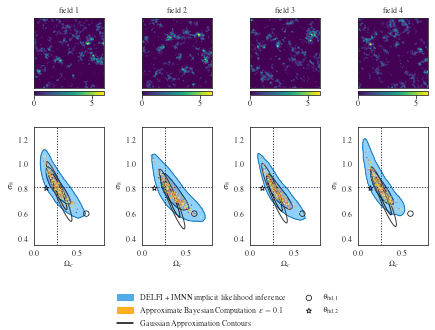

In [49]:
# do all fields' 2D plots
# fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(2*7.058, 3.41*2.), #figsize=(25, 13.5)) #
#                       gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})


fig,ax = plt.subplots(nrows=2, ncols=4, figsize=(7.058, 3.41*1.5)) #figsize=(25, 13.5)) #
                      #gridspec_kw={'height_ratios': [1, 1], 'width_ratios':[1,1,1,1]})
#latexify(3.41*2)

for i,delfi in enumerate(DELFIs):
    
    if i==0:
        im = ax[0, i].imshow(delfi['target_data'].reshape(128,128), 
                             cmap='viridis', 
                             vmin=0, vmax=6, 
                             interpolation='spline16')
    else:
        ax[0, i].imshow(delfi['target_data'].reshape(128,128), 
                             cmap='viridis',
                             vmin=0, vmax=6, 
                             interpolation='spline16')
    
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
    
    
    divider = make_axes_locatable(ax[0, i])
    cax = divider.append_axes('bottom', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='horizontal')
    

    
    cs = ChainConsumer()
    cs.add_chain(delfi['super_post'][500::90], parameters=params, name='DELFI + IMNN')
    # add GA
    cs.add_covariance(delfi['estimates'], np.linalg.inv(delfi['F_IMNN']), 
                      parameters=params, name="GA Estimate", color='k')
    cs.configure(smooth=1.5, linestyles=["-", "-"], linewidths=[1.0, 1.0],
            shade=[True, False], shade_alpha=[0.5, 0.0], tick_font_size=8)
    cs.plotter.plot_contour(ax[1, i], r"$\Omega_c$", r"$\sigma_8$")
    
    abc_handle = ax[1,i].scatter(ABC_posts[i][:, 0], ABC_posts[i][:, 1], s=8, alpha=0.6,
                c=np.log(ABC_dists[i]), cmap='inferno', 
                    edgecolors=None, linewidths=0, marker='.', zorder=10, label="ABC Estimate")
    

    
    ax[1, i].axvline(delfi['θ_target'][0], linestyle=':', linewidth=1)
    ax[1, i].axhline(delfi['θ_target'][1], linestyle=':', linewidth=1)
    
    point1 = ax[1, i].scatter(0.6, 0.6, marker='o', s=30, alpha=1., label=r'$\theta_{\rm fid,1}$',
                             facecolors='none', edgecolors='k', linewidth=0.7)
    
    point2 = ax[1, i].scatter(delfi['θ_fid_new'][0], delfi['θ_fid_new'][1], 
                              marker='*', s=30, label=r'$\theta_{\rm fid,2}$',
                             facecolors='none', edgecolors='k', linewidth=0.7)
    
    ax[1,i].set_xlabel(r'$\Omega_c$', fontsize=8)
    #if i == 0:
    ax[1,i].set_ylabel(r'$\sigma_8$', fontsize=8)
        
        
    ax[0, i].set_title('field %d'%(i+1), fontsize=8)
    
    ax[1,i].set_ylim([0.35, 1.3])
    ax[1,i].set_xlim([0.0, 0.8])
    
    line2, = ax[1,i].plot(np.ones(1)*-45, np.ones(1)*-45, linestyle='solid', color='k', label="Gaussian Approximation Contours")
    
    
patch1 = mpatches.Patch(color=colors[0][1], label='DELFI + IMNN implicit likelihood inference')
patch2 = mpatches.Patch(color='orange', label=r'Approximate Bayesian Computation $\varepsilon = 0.1$', alpha=0.86)
fig.legend(handles=[patch1, patch2, line2, point1,point2],bbox_to_anchor=(0.68, 0.12), fontsize=8, ncol=2, frameon=False,)

    
plt.subplots_adjust(wspace=0.55, hspace=0.1, bottom=0.21)


plt.savefig(outdir + 'new-four-cosmo-field-comparison', dpi=1200, bbox_inches='tight', rasterized=True)

# plot training history

In [33]:
foldername = '/Users/lucas/Datasets/imnn-ln-delfi/5mades_analysis/IMNN-training-1/'

history = np.load(foldername + 'cosmo-IMNN-history.npy')
imnnF = np.load(foldername + 'cosmo-IMNN-F.npy')
fidmodel = np.load(foldername + 'cosmo-IMNN-fid.npy' )
theoryF = np.load(foldername + 'cosmo-IMNN-theory-F.npy')
det_theoryF = np.load(foldername + 'cosmo-IMNN-theory-detF.npy')

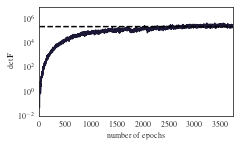

In [36]:
latexify(fig_width=3.37)
plt.plot(history[:])
plt.plot(np.ones(len(history[:]))*det_theoryF, c='k', linestyle='--')
plt.ylim(1e-2, 1e7)
plt.ylabel(r'$\det \textbf{F}$')
plt.xlabel('number of epochs')
plt.yscale('log')
plt.tight_layout()
plt.savefig(outdir + 'cosmo-IMNN-training.png', dpi=600)

In [37]:
fidmodel

array([0.6, 0.6], dtype=float32)